# Precipitation

## Mean precip

In [1]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from ml_downscaling_emulator import UKCPDatasetMetadata
from ml_downscaling_emulator.helpers import plot_over_ts
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid
from ml_downscaling_emulator.preprocessing.select_domain import SelectDomain

In [2]:
uk_mon_pr_ds = xr.open_mfdataset("/home/henry/cdt/summer/data/ceda/uk/2.2km/rcp85/01/pr/mon/*.nc")
uk_mon_pr_ds

<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 720,
                                 grid_latitude: 606, grid_longitude: 484,
                                 bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-16 00:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude                    (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    longitude                   (grid_latitude, grid_longitude) float64 dask.array<chunksize=(606, 484), meta=np.ndarray>
    month_number                (time) int32 dask.array<chunksize=(12,), meta=np.ndarray>
    year                        (time) int32 dask.array<chunksize=(12,), meta=np.ndarray>
    yyyymm                      (time) |S64 dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(1, 12, 606, 484), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float64 dask.array<chunksize=(12, 606, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float64 dask.array<chunksize=(12, 484, 2), meta=np.ndarray>
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2021-05-12T10:56:42
    domain:          uk
    frequency:       mon
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20210615
    Conventions:     CF-1.7

In [3]:
uk_pr_mean_da = uk_mon_pr_ds["pr"].isel(ensemble_member=0).mean(dim="time")
london_pr_mean_da = SelectDomain(subdomain="london").run(uk_pr_mean_da)

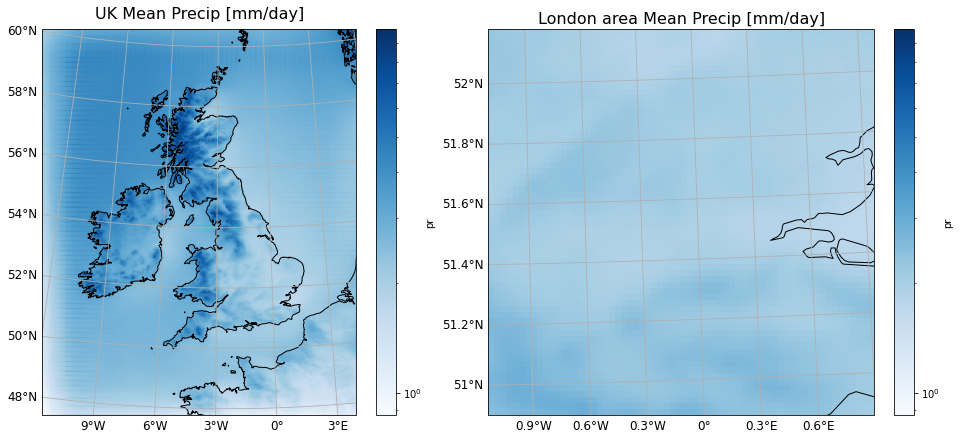

In [5]:
fig, axd = plt.subplot_mosaic([["uk", "london"]], figsize=(14, 6), subplot_kw={'projection': cp_model_rotated_pole}, constrained_layout=True)

ax = axd["uk"]
plot_grid(uk_pr_mean_da, ax=ax, title="UK Mean Precip [mm/day]", transform=cp_model_rotated_pole, cmap="Blues", norm=None, add_colorbar=True)

ax = axd["london"]
plot_grid(london_pr_mean_da, ax=ax, title="London area Mean Precip [mm/day]", transform=cp_model_rotated_pole, cmap="Blues", norm=None, add_colorbar=True)

plt.show()